In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [2]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)
X = X[:, ::-1] # Транспонируем для удобства оси координат

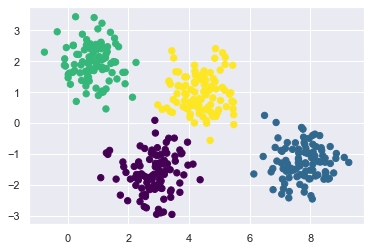

In [3]:
# Выводим данные на график с полученными методом k-средних метками
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')

In [4]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [5]:
def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
	labels = kmeans.fit_predict(X)
	# Выводим на рисунок входные данные
	ax = ax or plt.gca()
	ax.axis('equal')
	ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
	# Выводим на рисунок представление модели k-средних
	centers = kmeans.cluster_centers_
	radii = [cdist(X[labels == i], [center]).max() for i, center in enumerate(centers)]
	for c, r in zip(centers, radii):
		ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

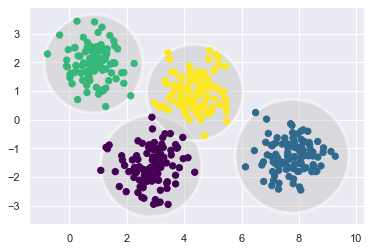

In [6]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

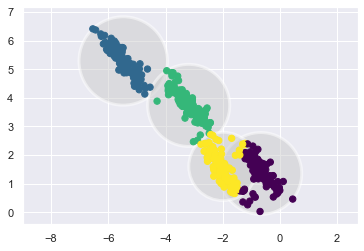

In [7]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

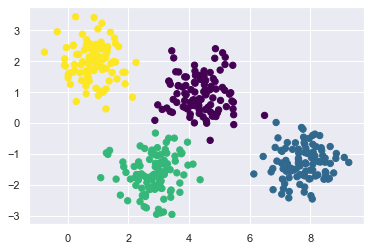

In [8]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [9]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.537 0.463 0.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 [1.    0.    0.    0.   ]
 [0.    0.    1.    0.   ]]


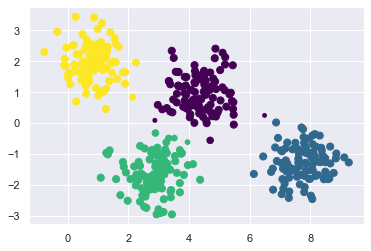

In [10]:
size = 50 * probs.max(1) ** 2 # Возведение в квадрат усиливает влияние различий
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

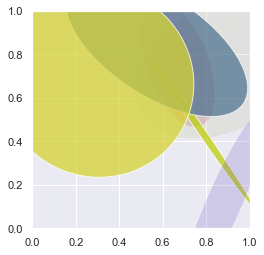

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse


# Fixing random state for reproducibility
np.random.seed(19680801)

NUM = 250

ells = [Ellipse(xy=np.random.rand(2) * 10,
                width=np.random.rand(), height=np.random.rand(),
                angle=np.random.rand() * 360)
        for i in range(NUM)]

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(np.random.rand())
    e.set_facecolor(np.random.rand(3))

plt.show()

In [12]:
from matplotlib.patches import Ellipse
def draw_ellipse(position, covariance, ax=None,**kwargs): 
	"""Рисует эллипс с заданными расположением и ковариацией""" 
	ax = ax or plt.gca()
	# Преобразуем ковариацию к главным осям координат
	if covariance.shape == (2, 2):
		U, s, Vt = np.linalg.svd(covariance)
		angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
		width, height = 2 * np.sqrt(s)
	else:
		angle = 0
		width, height = 2 * np.sqrt(covariance)
	# Рисуем эллипс
	for nsig in range(1, 4):
		# print(position, nsig * width, nsig * height, angle)
		e = Ellipse(xy=position, width=nsig * width, height=nsig * height, angle=angle, **kwargs)
		ax.add_artist(e)
		e.set_clip_box(ax.bbox)


def plot_gmm(gmm, X, label=True, ax=None):
	ax = ax or plt.gca()
	labels = gmm.fit(X).predict(X)
	if label:
		ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
	else:
		ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
		ax.axis('equal')
		w_factor = 0.2 / gmm.weights_.max()
		for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
			draw_ellipse(pos, covar, alpha=w * w_factor)

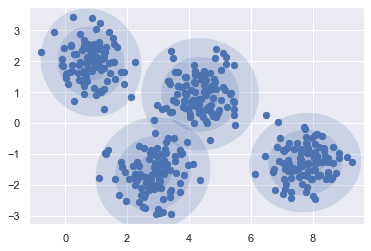

In [13]:
gmm = GaussianMixture(n_components=4, random_state=42)
plot_gmm(gmm, X, label=False)

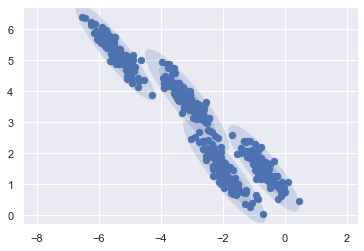

In [14]:
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched, label=False)

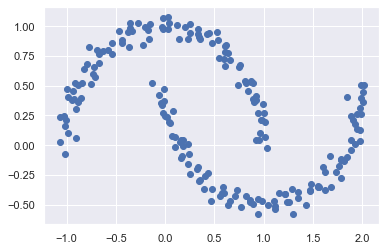

In [15]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

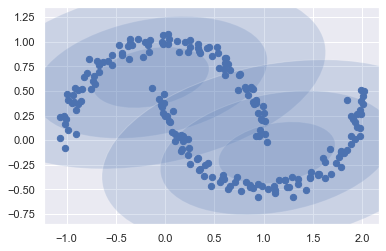

In [16]:
gmm2 = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
plot_gmm(gmm2, Xmoon, label=False)

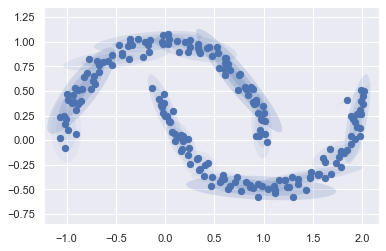

In [17]:
gmm16 = GaussianMixture(n_components=16, covariance_type='full', random_state=0)
plot_gmm(gmm16, Xmoon, label=False)

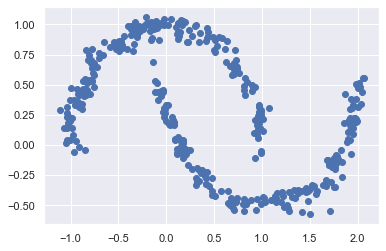

In [18]:
Xnew = gmm16.sample(400)[0]
plt.scatter(Xnew[:, 0], Xnew[:, 1]);

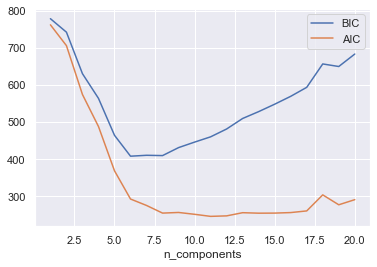

In [19]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(Xmoon) for n in n_components]

plt.plot(n_components, [m.bic(Xmoon) for m in models], label='BIC')
plt.plot(n_components, [m.aic(Xmoon) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [20]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [21]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

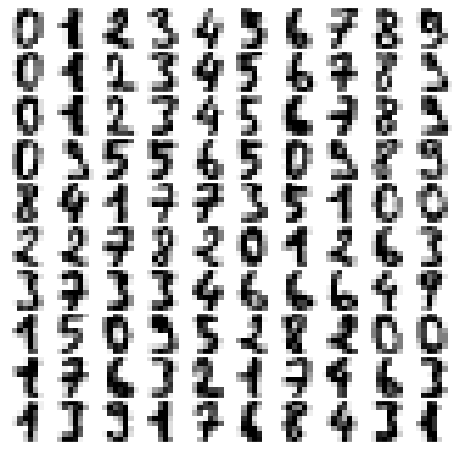

In [108]:
def plot_digits(data, is_digits=True):
	if is_digits:
		fig, ax = plt.subplots(10, 10, figsize=(8, 8), subplot_kw=dict(xticks=[], yticks=[]))
		fig.subplots_adjust(hspace=0.05, wspace=0.05)
		for i, axi in enumerate(ax.flat):
			im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
		im.set_clim(0, 16)
	else:
		fig, ax = plt.subplots(10, 10, figsize=(28, 28), subplot_kw=dict(xticks=[], yticks=[]))
		fig.subplots_adjust(hspace=0.05, wspace=0.05)
		for i, axi in enumerate(ax.flat):
			im = axi.imshow(data[i].reshape(28, 28), cmap='binary')
		im.set_clim(0, 16)
plot_digits(digits.data)

In [23]:
from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
data.shape

(1797, 41)

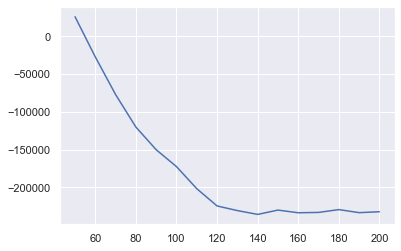

In [24]:
n_components = np.arange(50, 210, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0) for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics)

In [25]:
gmm = GaussianMixture(110, covariance_type='full', random_state=0)
gmm.fit(data)
print(gmm.converged_)

True


In [26]:
data_new = gmm.sample(100)[0]
data_new.shape

(100, 41)

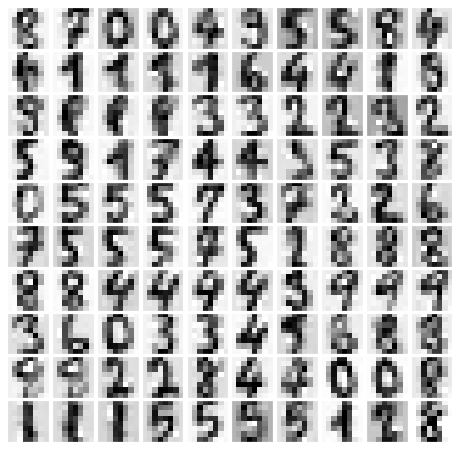

In [27]:
digits_new = pca.inverse_transform(data_new)
plot_digits(digits_new)

## Генерация фигур

In [35]:
import numpy as np
import cv2
import random

In [96]:
class FiguresGenerator:
	def triangle(self,):
		gen = self.gen
		x1, y1 = gen(0, 3), gen(10, 15)
		x2, y2 = gen(10, 13), gen(20, 25)
		x3, y3 = gen(5, 10), gen(2, 5)

		img = np.zeros((28, 28, 1), dtype = "uint8")
		pts = np.array([[x1, y1],[x2, y2],[x3, y3]], np.int32)
		pts = pts.reshape((-1,1,2))
		cv2.polylines(img,[pts],True,(255,255,255))
		return img
	
	def ellipse(self):
		gen = self.gen

		img = np.zeros((28,28,1), np.uint8)
		center_coordinates = (gen(12, 16), gen(12, 16))
		axesLength = (gen(6, 8), gen(5, 10))
		angle = 0
		startAngle = 0
		endAngle = 360
		color = (255, 255, 255)		
		thickness = 1
		
		image = cv2.ellipse(img, 
			center_coordinates, 
			axesLength,
			angle, 
			startAngle, 
			endAngle, 
			color, 
			thickness
		)

		return image

	def gen(self, start, end):
		return random.randint(start,end)

	def show(self, img):
		plt.imshow(img, interpolation='nearest')
		plt.show()

	def random_gen(self):
		num = self.gen(0, 1)
		img = []

		if num == 0:
			img = self.triangle()
		elif num == 1:
			img = self.ellipse()
		
		return img


	def test_triangle(self):
		self.show(self.triangle())
		
	def test_circle(self):
		self.show(self.ellipse())


class FiguresDataset:
	def __init__(self, ):
		self.dataset = []
		self.fig_generator = FiguresGenerator()
	
	def generate(self, amount=2000):
		for i in range(amount):
			img = self.fig_generator.random_gen()
			img = img.flatten()
			self.dataset.append(img)
		

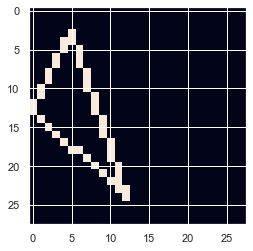

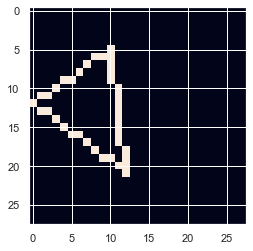

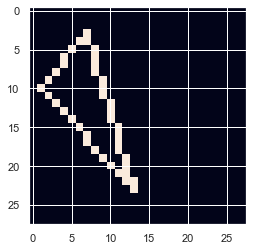

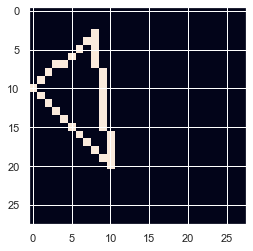

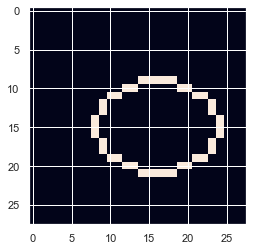

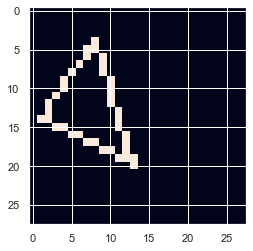

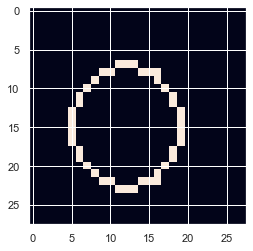

In [99]:
fig_gen = FiguresGenerator()

fig_dataset = FiguresDataset()
fig_dataset.generate()
i = 0
for img in fig_dataset.dataset:
	img = img.reshape(28, 28)
	fig_gen.show(img)
	if i > 5:
		break
	i += 1

In [102]:
from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True)
dataset = np.array(fig_dataset.dataset)
data = pca.fit_transform(dataset)
data.shape

(2000, 282)

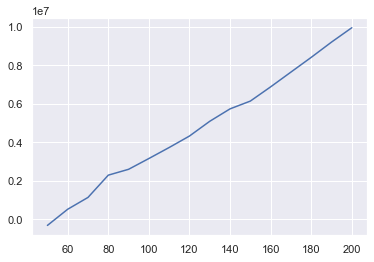

In [103]:
n_components = np.arange(50, 210, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0) for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics)

In [118]:
gmm = GaussianMixture(200, covariance_type='full', random_state=0)
gmm.fit(data)
print(gmm.converged_)

True


In [120]:
data_new = gmm.sample(100)[0]
data_new.shape

(100, 282)

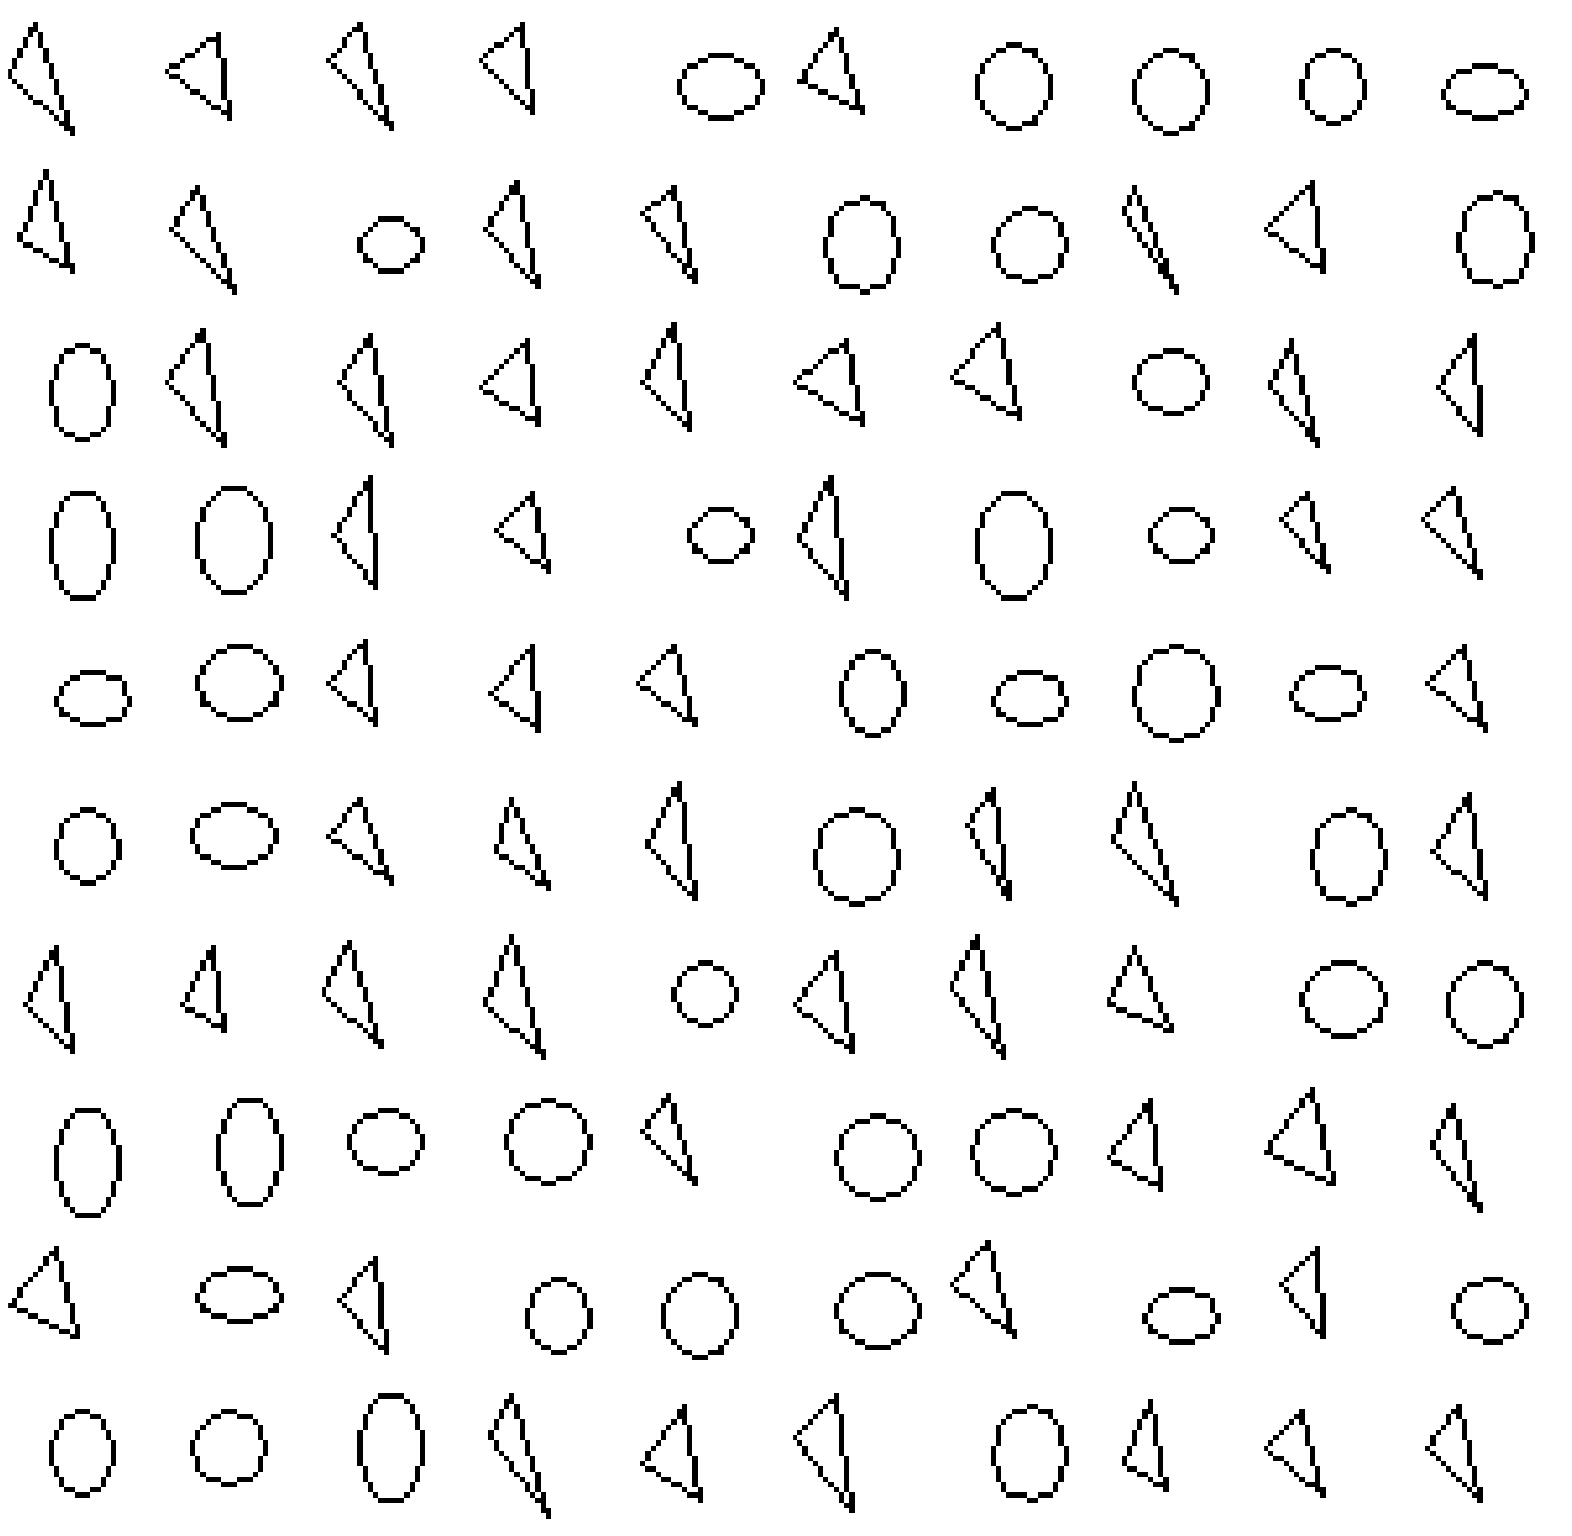

In [113]:
plot_digits(dataset[:100], is_digits=False)

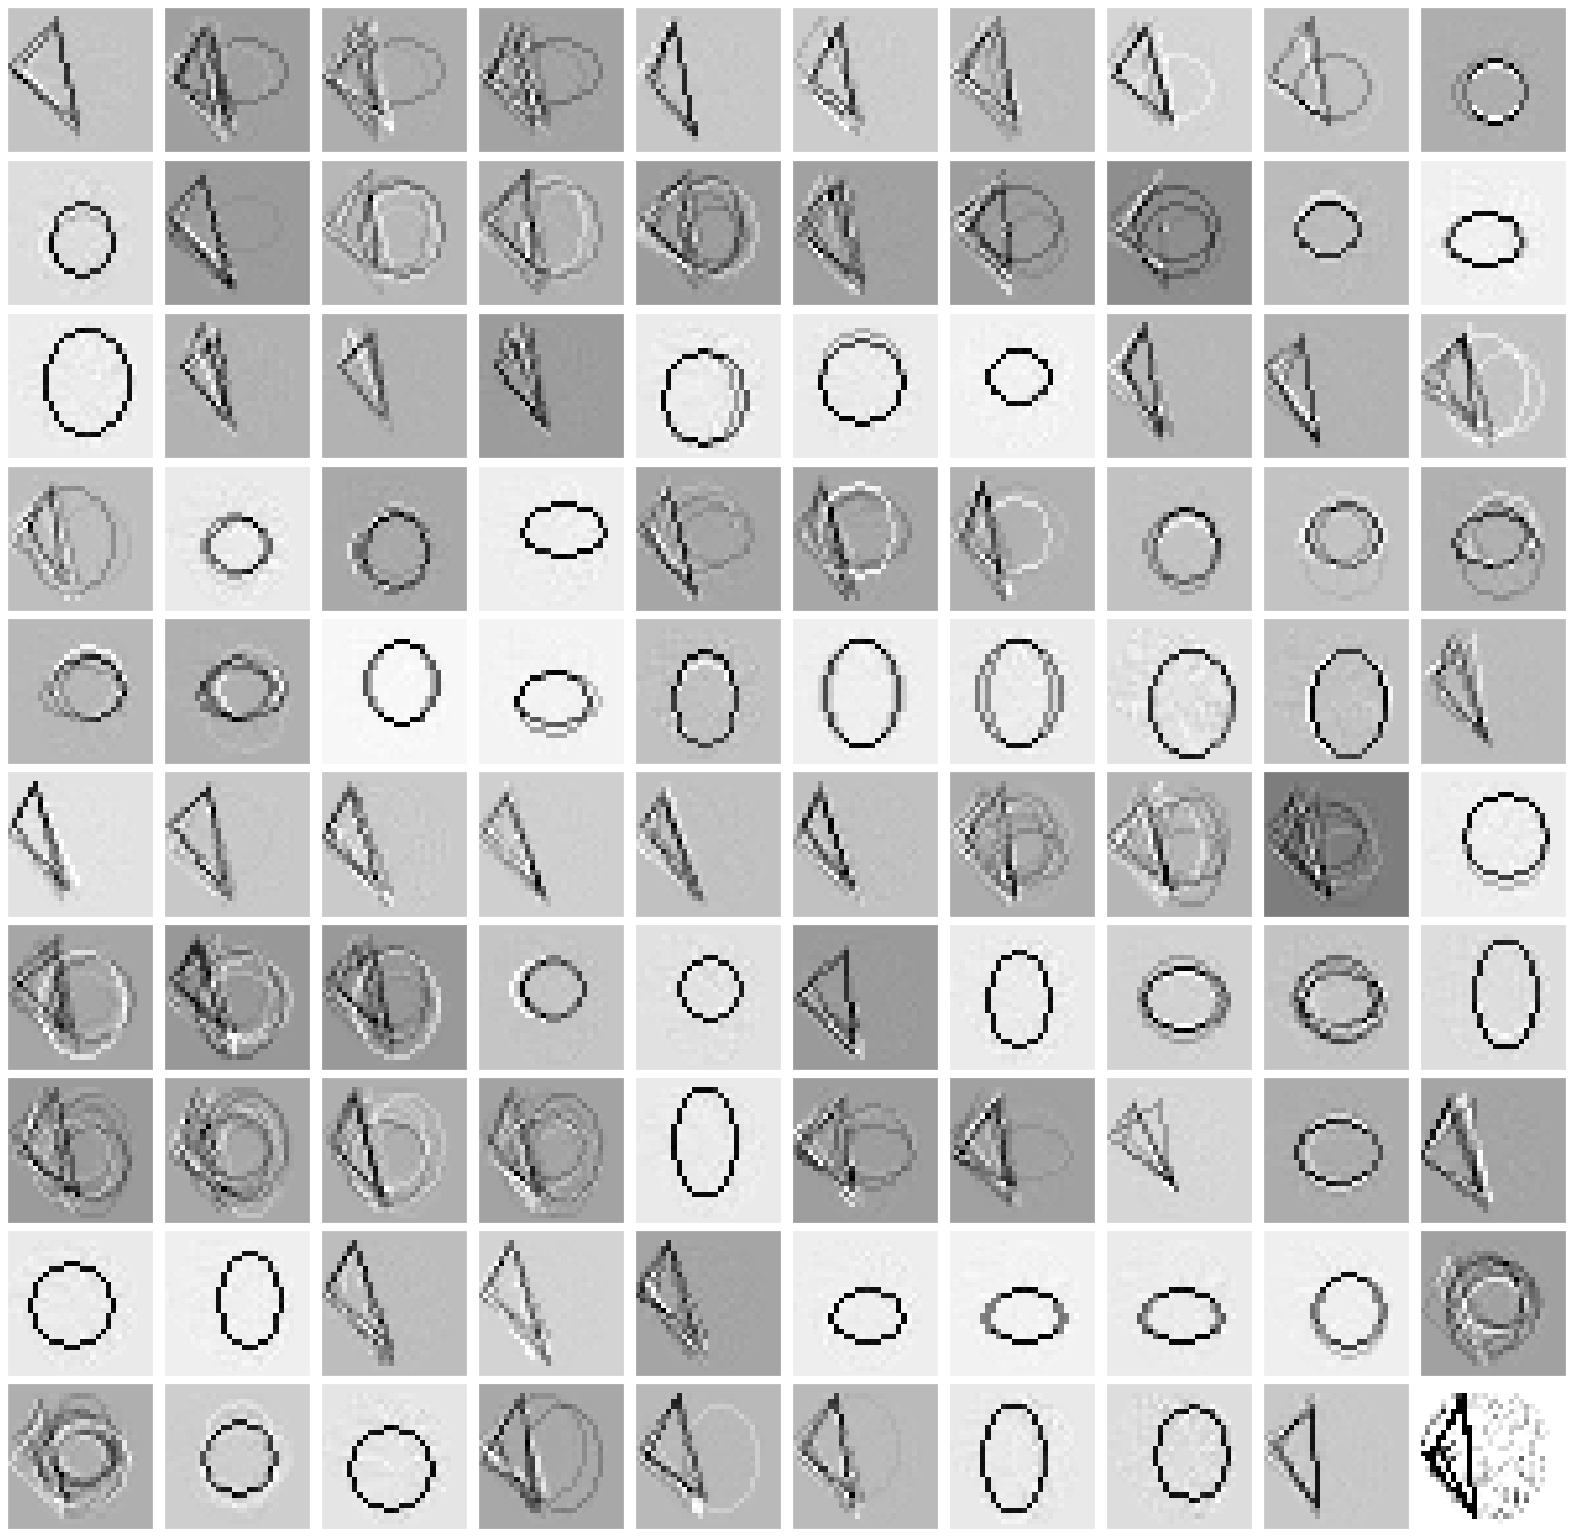

In [121]:
digits_new = pca.inverse_transform(data_new)
plot_digits(digits_new, is_digits=False)
